# TensorFlow MNIST visualization
# TensorFlow MNIST vizualizáció (in hungarian)

This is just a visulalization help to understand neural nets and Tensorflow better. More detailed (and better) tutorials are avaiable:
Csak a vizualizációs a pontsabb neural net és Tensorflow megértés segítésére. Részletesebb (és jobb) leírások elérhetőek:

https://www.tensorflow.org/get_started/mnist/beginners

https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist

## Először is importáljuk a szükséges libraryt, olvassuk be az MNIST adatbázist  


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Az MNIST felderítése

A beolvasott MNIST adatbázis train, test és validation dataseteket tartalmaz. A `train.images` például 55000 x 786 elemű, mivel 55000 kép 28 x 28 as felbontásban található benne. Ezt kiírathatjuk így pl:
```python
print(mnist.train.images.shape)
```
Pl a `train.labels` one-hot módon mutatja, hogy milyen számot ismerünk fel épp.

A `reshape` használlható a 784 elemű vektor 28 x 28 pixeles újrafrmálásához. Pl a `images[1220,:]` az 1220. képet választja ki a már ismert kettősont (`:`) operátorral. Megjelenítéshez használjuk a `matplotlib` `imshow` funkcióját. A `cmap` a color map-ot jelöli.  


Dimension: (55000, 784)
One-hot label: [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


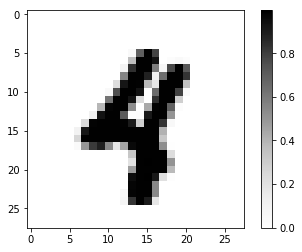

Max: 1.00
Min: 0.00


In [2]:
print("Dimension: ", end=""), print(mnist.train.images.shape)
print("One-hot label: ", end=""), print(mnist.train.labels[1220,:])
Img4 = np.reshape(mnist.train.images[1220,:], (28,28))
plt.imshow(Img4, cmap = "Greys")
plt.colorbar()
plt.show()
print("Max: {:0.2f}\nMin: {:0.2f}".format(Img4.max(), Img4.min()))

Img0 = np.reshape(mnist.train.images[1228,:], (28,28))
# plt.imshow(Img0, cmap = "Greys"), plt.colorbar(), plt.show()
Img7 = np.reshape(mnist.train.images[54842,:], (28,28))
#plt.imshow(Img7, cmap = "Greys"), plt.colorbar(), plt.show()

## Ezután készítsünk helyet a modellnek

`x  ` - kép (egy sorvektorként), bemenet

`W  ` - weight (súly), az egyik paraméter

`b  ` - bias, a másik paraméter

`y  ` - az előrejelzett kimenet

`y_ `- a valós kimenet

## $y = f(x_i, W, b) = x_i . W + b$

In [3]:
x  = tf.placeholder(tf.float32, [None, 784])
W  = tf.Variable(tf.zeros([784, 10]))
b  = tf.Variable(tf.zeros([10]))
y  = tf.matmul(x, W) + b
y_ = tf.placeholder(tf.float32, [None, 10])


## Definiáljuk a költségfüggvényt (cross entropy ebben az esetben) és a sessiont

A számolt és ismert valószínűségek közötti "távolság" máshogy fogalmazva "költség" (loss) számítására alkalmas, akár lehetne más ilyen távolság számítására alkalmas, 
mint L1 távolság, L2 távolság, Euklideszi távolság, de NN esetén ez jobban működik. Jelöljök $H_{y'}(y)$-el.


## $H_{y'}(y) = -\sum{Y_i'˙log(Y_i)}$

In [4]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

## Itt következhet a tanítás

Végezzük Kötegelt végrehajtásként (batch).
A konkrét végrehajtás a `sess.run()` parancs kiadásával lehetséges. 

Result: 40.75%
Result: 89.48%
Result: 90.31%
Result: 90.74%
Result: 90.37%
Result: 91.25%
Result: 91.16%
Result: 91.81%
Result: 91.64%
Result: 91.15%


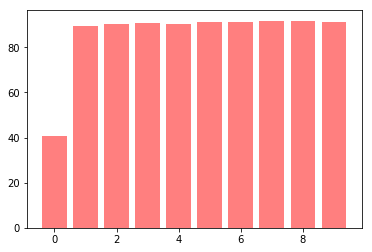

In [5]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if (i % 100) == 0:
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        result = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        print("Result: {:.2f}%".format(result * 100))
        plt.bar(i/100, (result * 100), alpha = 0.5, color = 'red')
plt.show()

## A tanítással végeztünk is, vizsgáljuk meg, mit kaptunk eredményül.

A `weight` közvetlenül nem, de a `.eval(sess)` parancs kiadásával elérhetővé válik a seissionon kívül is, klasszikus python adattípusként.

Figyeljük meg a 7-es szám súlyvektorát 28 x 28-as formávan.

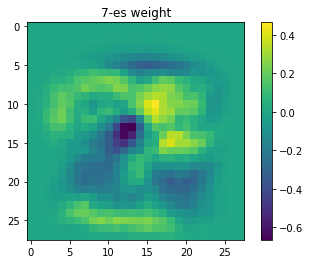

Max:  0.46
Min: -0.67


In [6]:
Weight7 = W.eval(sess)[:, 7]
Weight7 = np.reshape(Weight7, [28, 28])
plt.imshow(Weight7)
plt.title("7-es weight")
plt.colorbar()
plt.show()
#print(Weight7)
print("Max: {: 0.2f}\nMin: {:0.2f}".format(Weight7.max(), Weight7.min()))

A többi szám súlyvektorát megfigyelve láthatóvá válik a mintázat, ami alapján egy-egy számot felismer a NN. 

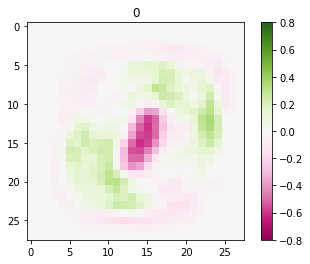

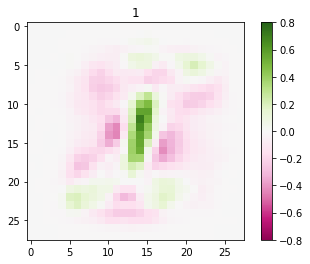

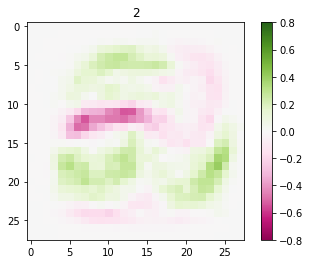

In [7]:
for i in range(0, 3):
    plt.imshow(np.reshape(W.eval(sess)[:, i], [28, 28]), cmap = "PiYG",  vmin=-0.8, vmax=0.8)
    plt.title(i)
    plt.colorbar()
    plt.show()

## Vegyünk 3 számot (0, 4, 7) és a 7-es weight-el szorozzuk össze
Figyeljük meg az eredményeket.

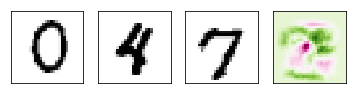

7es weight megszorozva a különböző számokkat:
0-ás: 22.28
4-es: 19.38
7-es: 37.75


In [8]:
plt.subplot(141), plt.imshow(Img0, cmap = "Greys"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(Img4, cmap = "Greys"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(Img7, cmap = "Greys"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(Weight7, cmap = "PiYG"), plt.xticks([]), plt.yticks([])
plt.show()
print("7es weight megszorozva a különböző számokkat:")
print("0-ás: {:.2f}".format(np.sum(np.matmul(Img0, Weight7)) * -1))
print("4-es: {:.2f}".format(np.sum(np.matmul(Img4, Weight7)) * -1))
print("7-es: {:.2f}".format(np.sum(np.matmul(Img7, Weight7)) * -1))